# Stocks data forecast


## Use Deep Recurrent Neural Networks to model stocks data values based on:
    - Target: Open session valule of a stock the next days
    - Model 1: Only historical open session values of the same stock.
    - Model 2: Add close, low and high values of the same stock.
    - Model 3: Add open values of other stocks correlated.
    
## Data
- New York stocks exanges values. 
- Downloaded from: https://www.kaggle.com/dgawlik/nyse 

In [1]:
from __future__ import print_function

import pandas as pd
import numpy as np
import tensorflow as tf
import os

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10) 


path='/Users/jorge/data/training/finance/nyse/'

In [2]:
# Read data
data = pd.read_csv(path+'prices-split-adjusted.csv')
data

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [3]:
# Basic descriptives
data.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


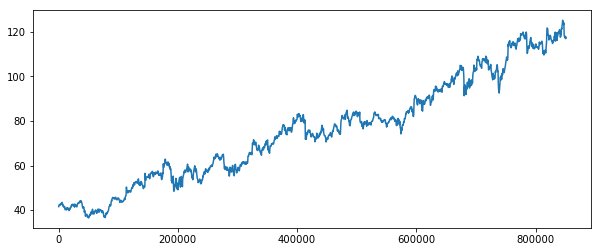

In [4]:
# Explore and model one stock
symbol = 'ACN'

# Plot historic data
plt.rcParams['figure.figsize'] = (10, 4) 
plt.plot(data[data.symbol == symbol]['open'])

# Select data for the model
serie = data[data.symbol == symbol]['open']


In [5]:
# Normalize columns
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
serie_scaled = min_max_scaler.fit_transform(serie.values.reshape(serie.shape[0],1))



In [6]:
# Main parameters
x_length = 28
y_length=2
num_validation_cases=10


In [7]:
def extract_data(serie, x_length=28, y_length=2, num_validation_cases=10, target_position=0):
    '''
    Build the arrays whit the data for the model.
        X.shape: [batch, x_length, num_features]
        y.shape: [batch]
    Parameters:
        serie: data for modeling
        x_length: Number of historical data to predict
        y_length: Forecast interval
        num_validation_cases: Separate for validation the last 3 cases
        target_position: Position in the DataFrame of the serie to predict to build the target
    
    '''
    max_index_train = len(serie) - y_length - x_length - num_validation_cases
    max_index_valid = max_index_train + num_validation_cases
    print(max_index_train, max_index_valid)

    # Create data
    X_trn = []
    X_val = []
    y_trn = []
    y_val = []
    for i in range(max_index_train):
        X_trn += [serie[i:i+x_length]]
        y_trn += [serie[i+x_length:i+x_length+y_length,target_position]]
    for i in range(max_index_train, max_index_valid):
        X_val += [serie[i:i+x_length]]
        y_val += [serie[i+x_length:i+x_length+y_length,target_position]]

    return np.array(X_trn), np.array(X_val), np.array(y_trn), np.array(y_val)




In [8]:
# Execute extraction
X_trn, X_val, y_trn, y_val = extract_data(serie_scaled, x_length=x_length, y_length=y_length,
                                          num_validation_cases=num_validation_cases)

print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)


1722 1732
(1722, 28, 1) (10, 28, 1) (1722, 2) (10, 2)


In [9]:
from tensorflow.contrib.keras import layers, models, optimizers

num_hidden_rnn =128

# Model
print('Build model 1 - One LSTM model...')

# LAYER 1: inputs
seq_input = layers.Input(shape=(x_length,1 ), dtype='float32') 

# LAYER 2: RNN - forwards LSTM with dropout
rnn_out = layers.LSTM(num_hidden_rnn, return_sequences=False, name='Forward')(seq_input)

# LAYER 3: Dense layer to outputs - softmax activation
output = layers.Dense(y_length, activation='relu')(rnn_out)

# Model Architecture defined
mdl_LSTM_1 = models.Model(inputs=seq_input, outputs=output)
mdl_LSTM_1.summary()

# Compile model and select optimizer
rms_optimizer = optimizers.RMSprop()
mdl_LSTM_1.compile(loss='mean_squared_error', optimizer=rms_optimizer, metrics=['mse'])


Build model 1 - One LSTM model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 1)             0         
_________________________________________________________________
Forward (LSTM)               (None, 128)               66560     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 66,818
Trainable params: 66,818
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train
print("Train...")
history = mdl_LSTM_1.fit(X_trn, y_trn, batch_size=16, epochs=25,
                         validation_data=(X_val, y_val))

Train...
Train on 1722 samples, validate on 10 samples
Epoch 1/25
1722/1722 [==============================] - 8s - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 2/25
1722/1722 [==============================] - 7s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 3/25
1722/1722 [==============================] - 8s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 4/25
1722/1722 [==============================] - 8s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 5/25
1722/1722 [==============================] - 9s - loss: 8.7048e-04 - mean_squared_error: 8.7048e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 6/25
1722/1722 [==============================] - 8s - loss: 7.8143e-04 - mean_squared_error: 7.8143e-04 - val_loss: 0.0022 - val_mean_squared_error: 0.0022

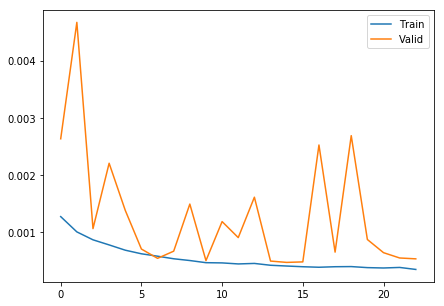

In [11]:
# Plot train history
plt.rcParams['figure.figsize'] = (7, 5) 

plt.plot(history.history['mean_squared_error'][2:], label='Train')
plt.plot(history.history['val_mean_squared_error'][2:], label='Valid')
plt.legend()
plt.show()

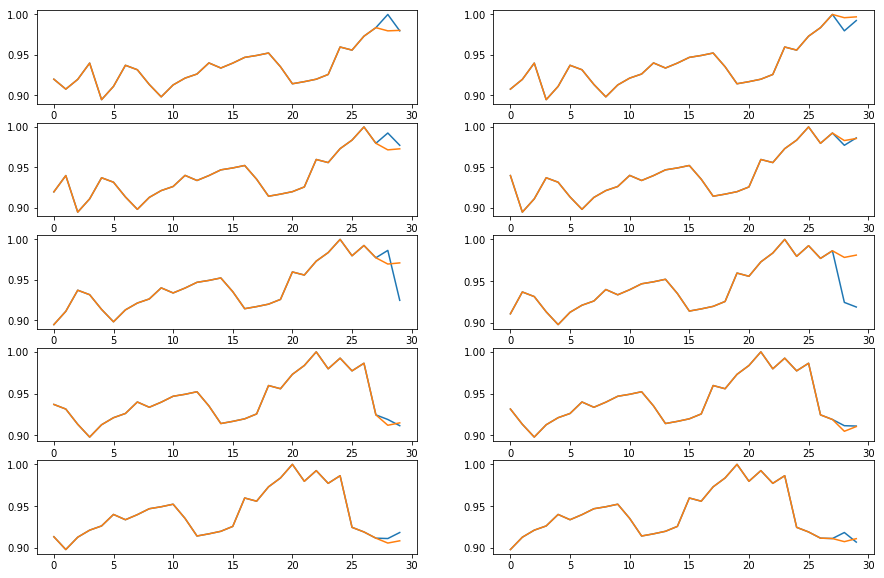

In [12]:
# Prediction
y_val_pred = mdl_LSTM_1.predict(X_val)

plt.rcParams['figure.figsize'] = (15, 10) 

# Plot real vs pred 
fig = plt.figure()
for i in range(10):
    a = fig.add_subplot(5,2,i+1)
    real = np.concatenate((X_val[i,:,0], y_val[i]))
    pred = np.concatenate((X_val[i,:,0], y_val_pred[i]))
    plt.plot(np.array([real,pred]).T)

# Real: blue, Predict: Orange

# Model 2: Add predictors to the input
- Add the data of close, low and high data to the input vector

In [13]:
# Use the open, close, low, high and volume to predict the next open
serie = data[data.symbol == symbol][['open','close', 'low', 'high']].values #returns a numpy array


In [14]:
# Normalize columns
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
serie_scaled = min_max_scaler.fit_transform(serie)


In [15]:
# Execute extraction
X_trn, X_val, y_trn, y_val = extract_data(serie_scaled, x_length=x_length, y_length=y_length,
                                          num_validation_cases=num_validation_cases)

print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)


1722 1732
(1722, 28, 4) (10, 28, 4) (1722, 2) (10, 2)


In [16]:
from tensorflow.contrib.keras import layers, models, optimizers

num_hidden_rnn = 128

seq_input = layers.Input(shape=(x_length, 4), dtype='float32') 

rnn_out = layers.LSTM(num_hidden_rnn, return_sequences=False, name='Forward2')(seq_input)

output = layers.Dense(y_length, activation='relu')(rnn_out)

mdl_LSTM_2 = models.Model(inputs=seq_input, outputs=output)
mdl_LSTM_2.summary()

# Compile model and select optimizer
rms_optimizer = optimizers.RMSprop()
mdl_LSTM_2.compile(loss='mean_squared_error', optimizer=rms_optimizer, metrics=['mse'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 4)             0         
_________________________________________________________________
Forward2 (LSTM)              (None, 128)               68096     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 68,354
Trainable params: 68,354
Non-trainable params: 0
_________________________________________________________________


In [17]:
history2 = mdl_LSTM_2.fit(X_trn, y_trn, batch_size=16, epochs=25,
                      validation_data=(X_val, y_val))

Train on 1722 samples, validate on 10 samples
Epoch 1/25
1722/1722 [==============================] - 6s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 2/25
1722/1722 [==============================] - 5s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 3/25
1722/1722 [==============================] - 5s - loss: 8.4906e-04 - mean_squared_error: 8.4906e-04 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 4/25
1722/1722 [==============================] - 5s - loss: 6.3369e-04 - mean_squared_error: 6.3369e-04 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 5/25
1722/1722 [==============================] - 5s - loss: 6.0078e-04 - mean_squared_error: 6.0078e-04 - val_loss: 7.4198e-04 - val_mean_squared_error: 7.4198e-04
Epoch 6/25
1722/1722 [==============================] - 5s - loss: 5.3030e-04 - mean_squared_error: 5.3030e-04 - val_loss: 9.0004e-04 - val_mean_sq

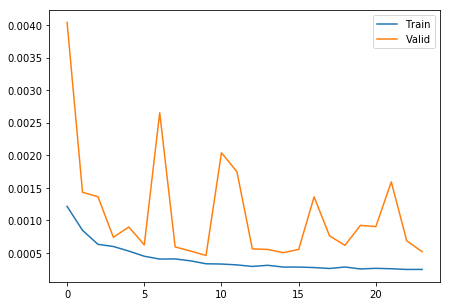

In [18]:
plt.rcParams['figure.figsize'] = (7, 5) 

plt.plot(history2.history['mean_squared_error'][1:], label='Train')
plt.plot(history2.history['val_mean_squared_error'][1:], label='Valid')
plt.legend()
plt.show()

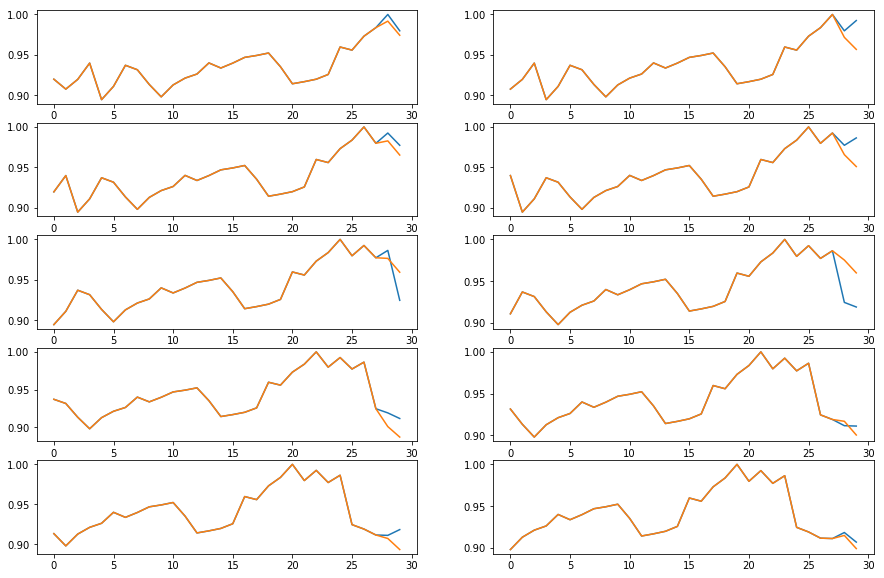

In [19]:
# Prediction
y_val_pred = mdl_LSTM_2.predict(X_val)

plt.rcParams['figure.figsize'] = (15, 10) 

# Plot real vs pred 
fig = plt.figure()
for i in range(10):
    a = fig.add_subplot(5,2,i+1)
    real = np.concatenate((X_val[i,:,0], y_val[i]))
    pred = np.concatenate((X_val[i,:,0], y_val_pred[i]))
    plt.plot(np.array([real,pred]).T)

# Real: blue, Predict: Orange

# Model 3: Add to the input other shares correlated.
- Find the top 10 shares correlated with the current and include it in the input vector

In [21]:
# Create a Dataframe with one serie by column
series_open = data.pivot_table(values='open', index=['date'], columns='symbol').reset_index()
series_open

symbol,date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
0,2010-01-04,22.453504,4.840000,40.700001,30.490000,NaN,26.290001,26.000339,41.520000,36.650002,...,25.340000,68.720001,35.529999,8.54,NaN,16.940001,25.248023,59.310001,12.940000,NaN
1,2010-01-05,22.324749,4.790000,40.299999,30.657143,NaN,26.650000,26.134683,42.099998,37.040001,...,25.330000,69.190002,35.240002,8.63,NaN,17.219999,25.248023,61.320000,13.280000,NaN
2,2010-01-06,22.067240,5.190000,40.049999,30.625713,NaN,26.389999,25.880388,42.090000,37.330002,...,25.000000,69.449997,35.020000,8.64,NaN,17.170000,25.125809,62.060001,13.670000,NaN
3,2010-01-07,22.017168,5.060000,39.549999,30.250000,NaN,25.770000,26.057914,42.500000,37.410000,...,24.860001,69.900002,35.080002,8.53,NaN,16.809999,24.852625,62.849998,14.970000,NaN
4,2010-01-08,21.917024,5.270000,40.250000,30.042856,NaN,25.860001,26.273824,42.509998,36.750000,...,24.540001,69.690002,35.560001,8.58,NaN,16.680000,24.946082,61.810001,16.190001,NaN
5,2010-01-11,22.088697,5.130000,40.720001,30.400000,NaN,26.240000,26.532916,42.439999,36.680000,...,25.010000,69.940002,35.570000,8.62,NaN,16.770000,25.075486,62.400002,16.469999,NaN
6,2010-01-12,21.859800,5.060000,39.430000,29.884285,NaN,26.320000,26.484937,42.209999,36.139999,...,24.360001,69.720001,35.959999,8.68,NaN,16.650000,25.528398,63.200001,16.379999,NaN
7,2010-01-13,21.795421,5.120000,39.500000,29.695715,NaN,26.590000,26.321805,42.450001,35.830002,...,24.160000,69.959999,36.009998,8.88,NaN,16.879999,25.758449,62.259998,15.950000,NaN
8,2010-01-14,21.881258,5.460000,39.939999,30.015715,NaN,26.969999,26.494533,42.720001,36.130001,...,23.969999,69.540001,36.150002,8.91,NaN,16.809999,25.815960,62.400002,16.360001,NaN
9,2010-01-15,22.331903,5.640000,39.340000,30.132856,NaN,27.260000,26.561704,42.959999,35.919998,...,24.120001,69.650002,36.220001,8.85,NaN,17.250000,26.074767,62.490002,16.780001,NaN


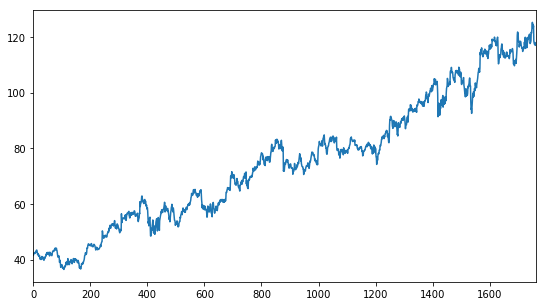

In [23]:
plt.rcParams['figure.figsize'] = (9, 5) 
series_open[symbol].plot()

In [22]:
# Find correlations between series
corr = series_open.corr()
corr

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
symbol,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.842184,0.853442,0.777608,0.757696,0.830873,0.815514,0.877729,0.879587,0.912462,...,0.907008,0.661865,0.888788,0.554788,0.884084,0.885657,0.847599,0.922161,0.771531,0.613254
AAL,0.842184,1.000000,0.937827,0.858011,0.805734,0.940668,0.917621,0.835120,0.897287,0.895215,...,0.804004,0.463361,0.857253,0.634884,0.553845,0.928357,0.773430,0.920599,0.726935,0.607274
AAP,0.853442,0.937827,1.000000,0.896886,0.873221,0.939292,0.903316,0.915183,0.933341,0.922827,...,0.826419,0.438065,0.926684,0.479024,0.649074,0.869068,0.838942,0.914352,0.675559,0.796079
AAPL,0.777608,0.858011,0.896886,1.000000,0.871342,0.885704,0.897007,0.847213,0.806147,0.872643,...,0.746091,0.523696,0.826919,0.344141,0.548770,0.789911,0.885096,0.841173,0.549079,0.825020
ABBV,0.757696,0.805734,0.873221,0.871342,1.000000,0.842022,0.840417,0.683904,0.798370,0.775731,...,0.401608,-0.239818,0.742075,0.430108,0.666425,0.794822,0.733760,0.879314,0.323265,0.815707
ABC,0.830873,0.940668,0.939292,0.885704,0.842022,1.000000,0.945274,0.861808,0.880778,0.906296,...,0.781514,0.416090,0.877082,0.551896,0.364416,0.894491,0.808702,0.915480,0.667640,0.744656
ABT,0.815514,0.917621,0.903316,0.897007,0.840417,0.945274,1.000000,0.859404,0.847682,0.892582,...,0.802841,0.560312,0.850062,0.493040,0.336543,0.902700,0.863604,0.919219,0.681701,0.650927
ACN,0.877729,0.835120,0.915183,0.847213,0.683904,0.861808,0.859404,1.000000,0.944895,0.942561,...,0.886503,0.515495,0.968362,0.274411,0.804106,0.815029,0.892872,0.906156,0.683449,0.878523
ADBE,0.879587,0.897287,0.933341,0.806147,0.798370,0.880778,0.847682,0.944895,1.000000,0.919628,...,0.850339,0.384785,0.963870,0.437584,0.872307,0.866462,0.794980,0.937468,0.732255,0.859182


In [23]:
# symbol = 'ACN'

# Pandas serie of correlations for the symbol
corr_serie = corr[symbol]

# Array of correlations in absolue value
array_corr = np.abs(corr_serie.values)

# Identify the index position of the top correlations
top_correlation_number = array_corr.argsort()[-10:][::-1]

# Identify the symbol for the top correlations
series_corr = [corr_serie.index[i] for i in top_correlation_number] # Include the self symbol.

print(' More correlated to ', symbol, ' : ', series_corr)

# Select the serie (in positon 0) and the 9 most correlated.
serie_stocks = series_open[series_corr]


 More correlated to  ACN  :  ['ACN', 'MKC', 'CHD', 'DHR', 'HD', 'MTD', 'CMS', 'AZO', 'EFX', 'V']


In [24]:
# Normalize columns
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
serie_stocks_scaled = min_max_scaler.fit_transform(serie_stocks)


In [25]:
# Execute extraction
X_trn_stocks, X_val_stocks, y_trn_stocks, y_val_stocks = extract_data(serie_stocks_scaled, x_length=x_length,
                                          y_length=y_length, num_validation_cases=num_validation_cases)

print(X_trn_stocks.shape, X_val_stocks.shape, y_trn_stocks.shape, y_val_stocks.shape)


1722 1732
(1722, 28, 10) (10, 28, 10) (1722, 2) (10, 2)


In [26]:
from tensorflow.contrib.keras import layers, models, optimizers

num_hidden_rnn = 128

# Previous network
seq_input = layers.Input(shape=(x_length,4 ), dtype='float32') 
rnn_out = layers.LSTM(num_hidden_rnn, return_sequences=False, dropout=0.0, name='Forward')(seq_input)

# New input
seq_input_stocks = layers.Input(shape=(x_length,10 ), dtype='float32') 
rnn_out_stocks = layers.LSTM(num_hidden_rnn, return_sequences=False, dropout=0.0, name='Forward_stocks')(seq_input_stocks)

# Concatenate
rnn_out2 = layers.concatenate([rnn_out, rnn_out_stocks], axis=1)

# Final dense layer
output = layers.Dense(y_length, activation='relu')(rnn_out2)

# Build model
mdl_LSTM_3 = models.Model(inputs=[seq_input, seq_input_stocks], outputs=output)
mdl_LSTM_3.summary()

# Compile model and select optimizer
rms_optimizer = optimizers.RMSprop(lr=0.001)
mdl_LSTM_3.compile(loss='mean_squared_error', optimizer=rms_optimizer, metrics=['mse'])


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 28, 4)         0                                            
____________________________________________________________________________________________________
input_4 (InputLayer)             (None, 28, 10)        0                                            
____________________________________________________________________________________________________
Forward (LSTM)                   (None, 128)           68096       input_3[0][0]                    
____________________________________________________________________________________________________
Forward_stocks (LSTM)            (None, 128)           71168       input_4[0][0]                    
___________________________________________________________________________________________

In [27]:
history3 = mdl_LSTM_3.fit([X_trn, X_trn_stocks], y_trn, batch_size=16, epochs=25,
                      validation_data=([X_val, X_val_stocks], y_val))

Train on 1722 samples, validate on 10 samples
Epoch 1/25
1722/1722 [==============================] - 9s - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 2/25
1722/1722 [==============================] - 8s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 3/25
1722/1722 [==============================] - 7s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 4/25
1722/1722 [==============================] - 8s - loss: 8.8937e-04 - mean_squared_error: 8.8937e-04 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5/25
1722/1722 [==============================] - 8s - loss: 7.7549e-04 - mean_squared_error: 7.7549e-04 - val_loss: 6.1573e-04 - val_mean_squared_error: 6.1573e-04
Epoch 6/25
1722/1722 [==============================] - 8s - loss: 6.1939e-04 - mean_squared_error: 6.1939e-04 - val_loss: 0.0010 - val_mean_squared_error:

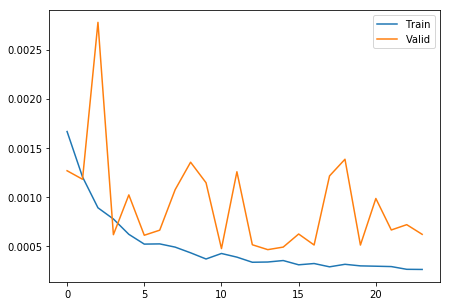

In [28]:
plt.rcParams['figure.figsize'] = (7, 5) 

plt.plot(history3.history['mean_squared_error'][1:], label='Train')
plt.plot(history3.history['val_mean_squared_error'][1:], label='Valid')
plt.legend()
plt.show()

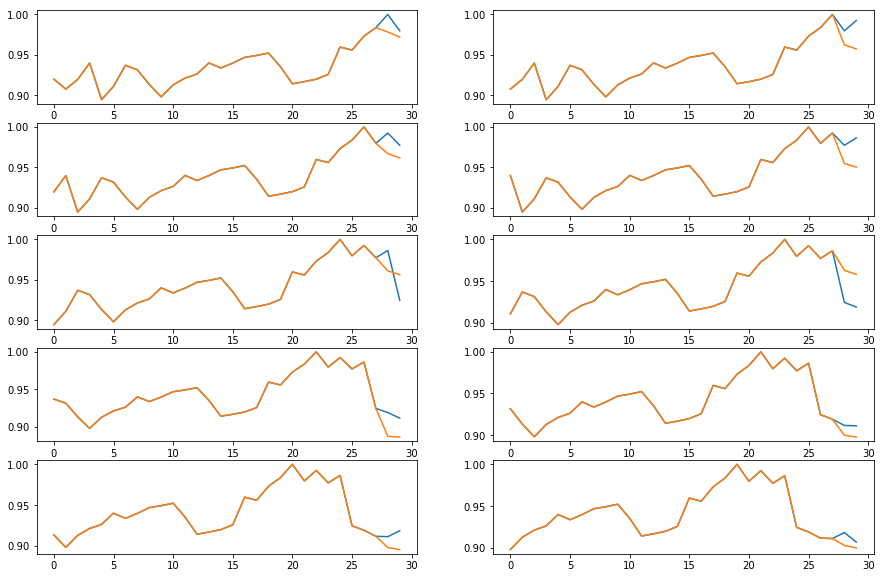

In [30]:
# Prediction
y_val_pred = mdl_LSTM_3.predict([X_val, X_val_stocks])

plt.rcParams['figure.figsize'] = (15, 10) 

# Plot real vs pred 
fig = plt.figure()
for i in range(10):
    a = fig.add_subplot(5,2,i+1)
    real = np.concatenate((X_val[i,:,0], y_val[i]))
    pred = np.concatenate((X_val[i,:,0], y_val_pred[i]))
    plt.plot(np.array([real,pred]).T)

# Real: blue, Predict: Orange